## What's a distance matrix?

In this activity, we will explore a special type of matrix, the distance matrix, which is a central tool in many areas of modern mathematics. Along the way, we will encounter some useful numpy functions which can be leveraged when working with a distance matrix. We will also begin to explore a formal mathematical notion of distance called a **__metric__**. Let's get started.

### Tools we will use

In [13]:
# Standard numpy library tools
import numpy as np

# Standard pandas library tools
import pandas as pd

# Standard matplotlib library tools
import matplotlib.pyplot as plt
%matplotlib inline

# Function for creating a distance matrix from a set of points
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
from scipy.spatial.distance import pdist

# Helper function for pdist which transforms its output into a square matrix
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform
from scipy.spatial.distance import squareform

# Ordered dictionaries 
from collections import OrderedDict

# Networkx graphs and graph algorithms
import networkx as nx

### The Euclidean Metric

In [2]:
def Euclidean_Distance(p1,p2):
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    
    return np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)

In [3]:
## Vertex Coordinates for a Cube in R^3
points = [(0,0,0), (1,0,0), (0,1,0), (0,0,1),
          (0,1,1), (1,0,1), (1,1,0), (1,1,1)]

N = len(points)
distance_matrix = np.zeros((N,N))

for i, p1 in enumerate(points):
    for j, p2 in enumerate(points):
        distance_matrix[i,j] = Euclidean_Distance(p1,p2)
        
print(distance_matrix)

[[0.         1.         1.         1.         1.41421356 1.41421356
  1.41421356 1.73205081]
 [1.         0.         1.41421356 1.41421356 1.73205081 1.
  1.         1.41421356]
 [1.         1.41421356 0.         1.41421356 1.         1.73205081
  1.         1.41421356]
 [1.         1.41421356 1.41421356 0.         1.         1.
  1.73205081 1.41421356]
 [1.41421356 1.73205081 1.         1.         0.         1.41421356
  1.41421356 1.        ]
 [1.41421356 1.         1.73205081 1.         1.41421356 0.
  1.41421356 1.        ]
 [1.41421356 1.         1.         1.73205081 1.41421356 1.41421356
  0.         1.        ]
 [1.73205081 1.41421356 1.41421356 1.41421356 1.         1.
  1.         0.        ]]


In [4]:
dist_matrix_euclidean = squareform(pdist(points, metric = Euclidean_Distance))
print(dist_matrix_euclidean, '\n')

[[0.         1.         1.         1.         1.41421356 1.41421356
  1.41421356 1.73205081]
 [1.         0.         1.41421356 1.41421356 1.73205081 1.
  1.         1.41421356]
 [1.         1.41421356 0.         1.41421356 1.         1.73205081
  1.         1.41421356]
 [1.         1.41421356 1.41421356 0.         1.         1.
  1.73205081 1.41421356]
 [1.41421356 1.73205081 1.         1.         0.         1.41421356
  1.41421356 1.        ]
 [1.41421356 1.         1.73205081 1.         1.41421356 0.
  1.41421356 1.        ]
 [1.41421356 1.         1.         1.73205081 1.41421356 1.41421356
  0.         1.        ]
 [1.73205081 1.41421356 1.41421356 1.41421356 1.         1.
  1.         0.        ]] 



In [5]:
df_euclidean = pd.DataFrame(data = dist_matrix_euclidean, index=points, columns=points)
print('Euclidean Distance Matrix')
df_euclidean

Euclidean Distance Matrix


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",0.000000,1.000000,1.000000,1.000000,1.414214,1.414214,1.414214,1.732051
"(1, 0, 0)",1.000000,0.000000,1.414214,1.414214,1.732051,1.000000,1.000000,1.414214
"(0, 1, 0)",1.000000,1.414214,0.000000,1.414214,1.000000,1.732051,1.000000,1.414214
"(0, 0, 1)",1.000000,1.414214,1.414214,0.000000,1.000000,1.000000,1.732051,1.414214
"(0, 1, 1)",1.414214,1.732051,1.000000,1.000000,0.000000,1.414214,1.414214,1.000000
"(1, 0, 1)",1.414214,1.000000,1.732051,1.000000,1.414214,0.000000,1.414214,1.000000
"(1, 1, 0)",1.414214,1.000000,1.000000,1.732051,1.414214,1.414214,0.000000,1.000000
"(1, 1, 1)",1.732051,1.414214,1.414214,1.414214,1.000000,1.000000,1.000000,0.000000


### The Taxi-Cab Metric

In [6]:
def taxi_cab_distance(p1,p2):
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    
    return abs(x1-x2) + abs(y1-y2) +abs(z1-z2)

dist_matrix_taxi_cab = squareform(pdist(points, metric = taxi_cab_distance))
df_taxi_cab = pd.DataFrame(data = dist_matrix_taxi_cab, index=points, columns=points)
print('Taxi-Cab Distance Matrix')
df_taxi_cab

Taxi-Cab Distance Matrix


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0
"(1, 0, 0)",1.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0
"(0, 1, 0)",1.0,2.0,0.0,2.0,1.0,3.0,1.0,2.0
"(0, 0, 1)",1.0,2.0,2.0,0.0,1.0,1.0,3.0,2.0
"(0, 1, 1)",2.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0
"(1, 0, 1)",2.0,1.0,3.0,1.0,2.0,0.0,2.0,1.0
"(1, 1, 0)",2.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
"(1, 1, 1)",3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0


### The Hamming Metric

In [7]:
def hamming_distance(s1, s2):
    return sum(l1 != l2 for l1, l2 in zip(s1, s2))

dist_matrix_hamming = squareform(pdist(points, metric = hamming_distance))
df_hamming = pd.DataFrame(data = dist_matrix_hamming, index=points, columns=points)
print('Hamming Distance Matrix')
df_hamming

Hamming Distance Matrix


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",0.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0
"(1, 0, 0)",1.0,0.0,2.0,2.0,3.0,1.0,1.0,2.0
"(0, 1, 0)",1.0,2.0,0.0,2.0,1.0,3.0,1.0,2.0
"(0, 0, 1)",1.0,2.0,2.0,0.0,1.0,1.0,3.0,2.0
"(0, 1, 1)",2.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0
"(1, 0, 1)",2.0,1.0,3.0,1.0,2.0,0.0,2.0,1.0
"(1, 1, 0)",2.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
"(1, 1, 1)",3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0


In [8]:
## The hamming metric returns NORMALIZED hamming distance
## That is, number of replacements needed divided by the length of the strings
## We are interested in ABSOLUTE hamming distance, i.e. number of replacements needed
test = 3*squareform(pdist(points, metric = 'hamming'))
df = pd.DataFrame(data = test, index=points, columns=points)

### The Shortest-Path Metric

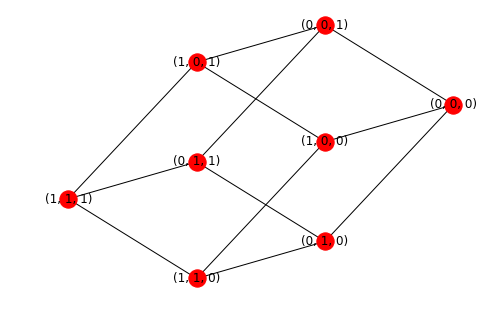

In [19]:
G = nx.hypercube_graph(3)
nx.draw(G, pos = nx.spectral_layout(G), with_labels=True)
plt.show()

In [21]:
p = dict(nx.shortest_path_length(G))
d = OrderedDict()
for k,v in sorted(p.items()):
    d[k] = v
    
df_shortest_path = pd.DataFrame(d, index=points, columns=points)
print('Shortest-Path Distance Matrix')
df_shortest_path

Shortest-Path Distance Matrix


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",0,1,1,1,2,2,2,3
"(1, 0, 0)",1,0,2,2,3,1,1,2
"(0, 1, 0)",1,2,0,2,1,3,1,2
"(0, 0, 1)",1,2,2,0,1,1,3,2
"(0, 1, 1)",2,3,1,1,0,2,2,1
"(1, 0, 1)",2,1,3,1,2,0,2,1
"(1, 1, 0)",2,1,1,3,2,2,0,1
"(1, 1, 1)",3,2,2,2,1,1,1,0


In [11]:
print('Hamming = Taxi-Cab')
df_hamming == df_taxi_cab

Hamming = Taxi-Cab


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",True,True,True,True,True,True,True,True
"(1, 0, 0)",True,True,True,True,True,True,True,True
"(0, 1, 0)",True,True,True,True,True,True,True,True
"(0, 0, 1)",True,True,True,True,True,True,True,True
"(0, 1, 1)",True,True,True,True,True,True,True,True
"(1, 0, 1)",True,True,True,True,True,True,True,True
"(1, 1, 0)",True,True,True,True,True,True,True,True
"(1, 1, 1)",True,True,True,True,True,True,True,True


In [12]:
print('Taxi-Cab = Shortest-Path')
df_taxi_cab == df_shortest_path

Taxi-Cab = Shortest-Path


,"(0, 0, 0)","(1, 0, 0)","(0, 1, 0)","(0, 0, 1)","(0, 1, 1)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
"(0, 0, 0)",True,True,True,True,True,True,True,True
"(1, 0, 0)",True,True,True,True,True,True,True,True
"(0, 1, 0)",True,True,True,True,True,True,True,True
"(0, 0, 1)",True,True,True,True,True,True,True,True
"(0, 1, 1)",True,True,True,True,True,True,True,True
"(1, 0, 1)",True,True,True,True,True,True,True,True
"(1, 1, 0)",True,True,True,True,True,True,True,True
"(1, 1, 1)",True,True,True,True,True,True,True,True
